# Using Jupyter notebook for interactive development

    url: http://jupyter.org/
    
![](./main-logo-jupyter.svg)

## Install

```bash
conda install parmed -c ambermd # Python package for topology editing and force field development
conda install pytraj-dev -c ambermd # Python interface for cpptraj (MD trajectory data analysis)
conda install pysander -c ambermd # Python interface for SANDER
# all above will be also available in AMBER16 release (next few months)

conda install nglview -c ambermd # Protein/DNA/RAN viewer in notebook

conda install jupyter notebook # notebook

```

## ParmEd: Cross-program parameter and topology file editor and molecular mechanical simulator engine.
    
    url: https://github.com/ParmEd/ParmEd (AMBER16)

In [3]:
import warnings
warnings.filterwarnings('ignore')
import parmed as pmd

x = pmd.load_file('tz2.pdb')
[res.name for res in x.residues]

OSError: tz2.pdb does not exist

In [16]:
[atom.name for atom in x.residues[0]]

['N', 'H1', 'H2', 'H3', 'CA', 'HA', 'CB', 'HB2', 'HB3', 'OG', 'HG', 'C', 'O']

## PYTRAJ: Interactive data analysis for molecular dynamics simulations

    url: https://github.com/Amber-MD/pytraj (AMBER 16)

In [4]:
import pytraj as pt

traj = pt.load('tz2.nc', 'tz2.parm7')[:1].save('tz2.pdb')
distances = pt.distances(traj, ':1 :12', dtype='dataframe')
distances.head()

ValueError: <None> is a wrong input. Can not use `None` or string type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f00b8be0>]], dtype=object)

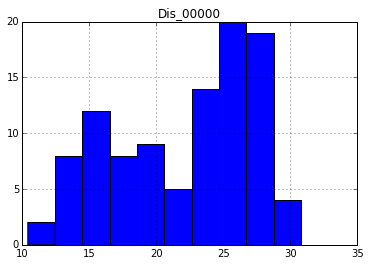

In [14]:
%matplotlib inline 

distances.hist()

In [5]:
energies = pt.energy_decomposition(traj, prmtop='tz2.parm7', dtype='dataframe')
energies[['bond', 'angle', 'dihedral', 'gb']].head() # kcal/mol

# gb: implicit solvation energy

,bond,angle,dihedral,gb
0,0.015314,128.545148,111.611329,-412.532664
1,0.013582,105.064945,105.392413,-400.090422
2,0.012521,103.520284,93.030850,-439.927013
3,0.016334,94.560780,105.522288,-400.956276
4,0.013338,99.508124,105.850222,-404.061030


In [6]:
help(pt.energy_decomposition)

Help on function energy_decomposition in module pytraj.externals.energy:

energy_decomposition(traj=None, prmtop=None, igb=8, mm_options=None, qm_options=None, mode=None, dtype='dict', frame_indices=None, top=None)
    energy decomposition by calling `libsander`
    
    Parameters
    ----------
    traj : Trajectory-like or iterables that produce Frame
        if `traj` does not hold Topology information, `top` must be provided
    prmtop : str or Structure from ParmEd, default=None, optional
        To avoid any unexpected error, you should always provide original topology
        filename. If prmtop is None, pytraj will load Topology from traj.top.filename.
    
        - why do you need to load additional topology filename? Because cpptraj and sander
          use different Topology object, can not convert from one to another.
    igb : GB model, default=8 (GB-Neck2)
        If specify `mm_options`, this `igb` input will be ignored
    mm_options : InputOptions from `sander`, defa

In [7]:
dihedrals = pt.multidihedral(traj, resrange='1-3', dtype='dataframe')
dihedrals.head(3)

,psi_1,phi_2,psi_2,chip_2,omega_2,phi_3,psi_3,omega_3
0,-86.697506,-52.781235,-37.458655,-167.770537,-170.555872,-79.867366,117.355933,-179.707558
1,-91.159994,-40.620800,-41.199817,-178.620425,177.860923,-120.154899,108.983575,-178.763975
2,-67.937422,-51.215481,-49.467222,-179.101253,160.530607,-52.189986,132.574742,164.425577


(-180, 180)

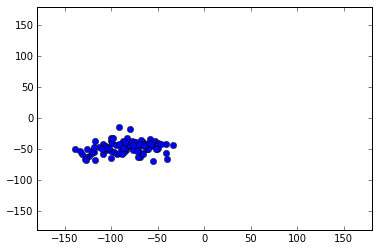

In [8]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(dihedrals['phi_2'], dihedrals['psi_2'], '-bo', linewidth=0)
plt.xlim([-180, 180])
plt.ylim([-180, 180])

## Protein/DNA/RNA viewer in notebook

In [9]:
import warnings
warnings.filterwarnings('ignore')

import nglview as nv
view = nv.show_pytraj(traj)
view

In [10]:
view.representations = []
view.add_representation('cartoon', color='residueindex')
view.add_representation('licorice')

In [11]:
t0 = pt.fetch_pdb('3pqr')
view0 = pt.view.to_nglview(t0)
view0

In [15]:
view0.representations = []
view0.add_representation('cartoon', selection='protein', color='residueindex')
view0.add_representation('licorice', selection='not protein')

## Auto-doc generation

(other slides)

## Phenix wishlist

- phenix.conda install jupyter notebook
- phenix.conda install ipython
- phenix.conda install pandas
- phenix.jupyter notebook
- phenix.ipython